# 1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

## 파이토치 시작하기

In [1]:
import torch

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두 개 만들고 행으로 병합, 열로 병합


In [2]:
X = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12]])
# X = torch.arange(1,13, dtype = torch.float32).reshape(4,3)

Y = torch.tensor([[21,22,23], [24,25,26], [27,28,29], [30,31,32]])
# Y = torch.arange(21,33, dtype = torch.float32).reshape(4,3)

print(X)
print(Y)

# 행으로 병합 코드
print(torch.cat((X,Y), dim = 0))

# 열로 병합 코드
print(torch.cat((X,Y), dim = 1))




tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
tensor([[21, 22, 23],
        [24, 25, 26],
        [27, 28, 29],
        [30, 31, 32]])
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29],
        [30, 31, 32]])
tensor([[ 1,  2,  3, 21, 22, 23],
        [ 4,  5,  6, 24, 25, 26],
        [ 7,  8,  9, 27, 28, 29],
        [10, 11, 12, 30, 31, 32]])


### Linear Regression Implementation from Scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [3]:
!pip install d2l # d2l 라이브러리에서 제공하는 기능 사용 위함

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
 

In [4]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [5]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [6]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([ 0.1202, -0.9962]) 
label: tensor([7.3447])


In [7]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
     ###반복문으로 채워넣기:
    for i in range(0, num_examples, batch_size):   # 0~19, 20~39, ... 1980~1999
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [8]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.4138,  0.3039],
        [-1.7260,  1.0326],
        [ 0.0077, -1.6743],
        [ 1.4821,  0.0216],
        [-0.9874, -0.2595],
        [ 1.3721, -0.6728],
        [-0.3998,  2.0394],
        [-0.6494,  0.6677],
        [ 0.5995,  1.3655],
        [-1.9912, -0.0127],
        [ 0.1899,  1.0764],
        [ 0.0902, -0.2224],
        [-0.6002,  0.1376],
        [-0.2906,  1.2418],
        [ 0.0432, -0.8722],
        [-0.2293, -0.7157],
        [ 0.1470, -3.4285],
        [ 0.5955, -0.2996],
        [ 0.0126, -0.8145],
        [-0.0199,  1.3970]]) 
 tensor([[ 6.2916],
        [-1.2190],
        [ 8.0407],
        [ 9.9108],
        [ 2.9495],
        [10.6154],
        [ 1.2322],
        [ 2.5602],
        [ 5.2549],
        [-0.4580],
        [ 4.4510],
        [ 6.1060],
        [ 3.4716],
        [ 2.7695],
        [ 6.9152],
        [ 5.8926],
        [11.0893],
        [ 7.7201],
        [ 6.7569],
        [ 3.3460]])


In [9]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([0.5])#원하는 실수를 넣어주세요

In [10]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b ###lr func 코드 완성하기

In [11]:
def squared_loss(y_hat, y):
    """Squared loss."""
    return torch.mean((y_hat - y) ** 2)###loss function 직접 짜보기

In [12]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
      for param in params:
            if param.grad is not None:
                param -= lr * param.grad / batch_size
                # 그래디언트 0으로 초기화
                param.grad.zero_()


In [13]:
epoch_values = []
loss_values = []

w0_values = []
w1_values = []

lr = 0.05###직접 설정
num_epochs = 20 ###직접 설정
net = linreg ###위에서 가져오기
loss = squared_loss ###위에서 가져오기

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size) ###채워넣기)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

    epoch_values.append(epoch+1)
    w0_values.append(w.tolist()[0])
    w1_values.append(w.tolist()[1])
    loss_values.append(train_l.item())



epoch 1, loss 29.282005
epoch 2, loss 26.599808
epoch 3, loss 25.586344
epoch 4, loss 25.221239
epoch 5, loss 25.074598
epoch 6, loss 25.028994
epoch 7, loss 25.007669
epoch 8, loss 25.002073
epoch 9, loss 25.000137
epoch 10, loss 24.999359
epoch 11, loss 24.999544
epoch 12, loss 24.999081
epoch 13, loss 24.998999
epoch 14, loss 24.998529
epoch 15, loss 24.998491
epoch 16, loss 24.998419
epoch 17, loss 24.998335
epoch 18, loss 24.998478
epoch 19, loss 24.998436
epoch 20, loss 24.998526


In [14]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([-0.0365,  0.0178], grad_fn=<SubBackward0>)
error in estimating b: tensor([5.])


\+ cost graph 그리기 (x축 w, y축 loss)

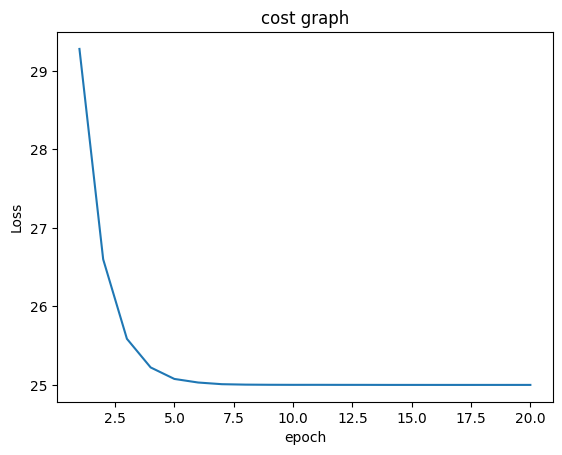

In [15]:
import matplotlib.pyplot as plt

# epoch에 따른 loss 감소
plt.plot(epoch_values, loss_values)
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('cost graph')
plt.show()

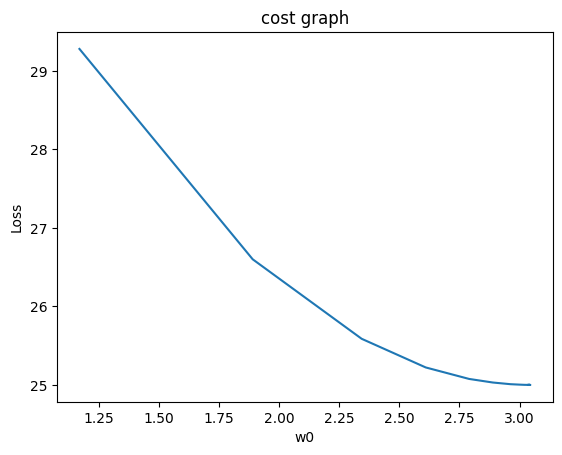

In [16]:
plt.plot(w0_values, loss_values)
plt.xlabel('w0')
plt.ylabel('Loss')
plt.title('cost graph')
plt.show()

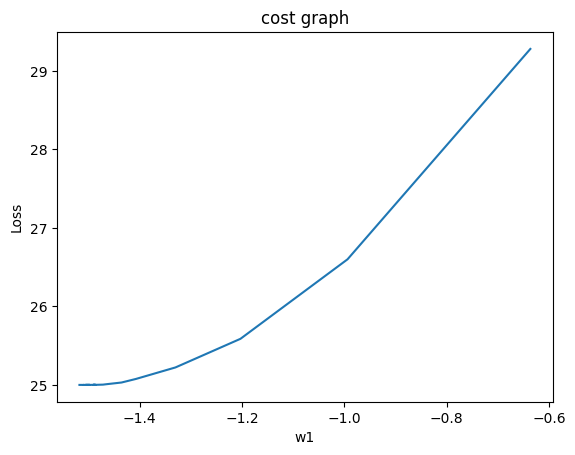

In [17]:
plt.plot(w1_values, loss_values)
plt.xlabel('w1')
plt.ylabel('Loss')
plt.title('cost graph')
plt.show()

### Concise Implementation of Linear Regression
- API 사용해보기

In [18]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [19]:
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [20]:
next(iter(data_iter))

[tensor([[-3.6482e-01, -5.5997e-01],
         [ 1.7946e-03,  1.5002e-02],
         [-5.4850e-01, -5.1559e-01],
         [ 8.6101e-01, -4.4544e-01],
         [ 9.8642e-01,  1.3467e-01],
         [-7.4514e-01,  1.0093e+00],
         [ 3.7929e-01, -1.8183e+00],
         [ 4.1979e-01,  1.1441e-01],
         [ 4.4866e-01, -6.0830e-01],
         [-1.1496e+00, -1.8470e+00],
         [ 7.2471e-01,  5.0898e-01],
         [-6.1394e-01,  1.6077e+00],
         [-9.4835e-01,  1.6036e+00],
         [ 8.2125e-02, -1.0823e+00],
         [ 6.8506e-02, -3.0706e-01],
         [ 1.2449e-01, -1.4184e+00],
         [ 1.6544e+00,  1.0720e+00],
         [ 2.0795e-01,  7.2453e-01],
         [-4.8364e-01,  9.6470e-01],
         [ 5.0560e-01,  1.8728e-01]]),
 tensor([[5.2407],
         [5.4868],
         [4.6513],
         [8.7564],
         [8.2634],
         [1.7452],
         [9.3517],
         [6.5956],
         [7.7568],
         [4.8172],
         [6.9211],
         [1.2434],
         [0.2417],
         [7

In [21]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

In [22]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [23]:
loss = nn.MSELoss() ###api function으로 직접 설정

In [24]:
trainer = torch.optim.SGD(net.parameters(), lr=0.01)###api function으로 직접 설정

In [25]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.678798
epoch 2, loss 0.011036
epoch 3, loss 0.000272


In [26]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data   ###학습결과 b 구하는 식
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 0.0048, -0.0028])
error in estimating b: tensor([0.0120])
